In [1]:
import cv2
import numpy as np
from utils import imshow
import matplotlib.pyplot as plt

In [2]:
pic = cv2.imread(r"E:\Blind lane detection\08.jpg")
height, width, channels = pic.shape
# imshow(pic, "image")

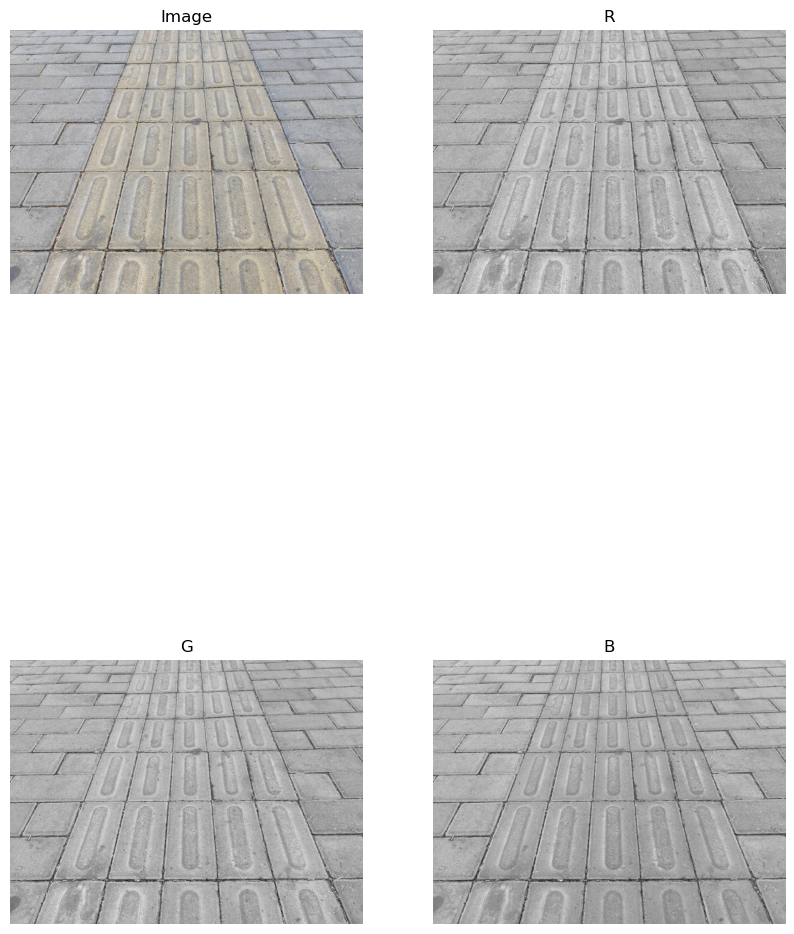

In [3]:
pic_file = r"E:\Blind lane detection\08.jpg"
img_bgr = cv2.imread(pic_file, cv2.IMREAD_COLOR) #OpenCV读取颜色顺序：BRG 
img_b = img_bgr[..., 0]
img_g = img_bgr[..., 1]
img_r = img_bgr[..., 2]
fig = plt.gcf()                                  #图片详细信息


fig = plt.gcf()                                  #分通道显示图片
fig.set_size_inches(10, 15)

plt.subplot(221)
plt.imshow(np.flip(img_bgr, axis=2))             #展平图像数组并显示
plt.axis('off')
plt.title('Image')

plt.subplot(222)
plt.imshow(img_r, cmap='gray')
plt.axis('off')
plt.title('R')

plt.subplot(223)
plt.imshow(img_g, cmap='gray')
plt.axis('off')
plt.title('G')

plt.subplot(224)
plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.title('B')

plt.show()


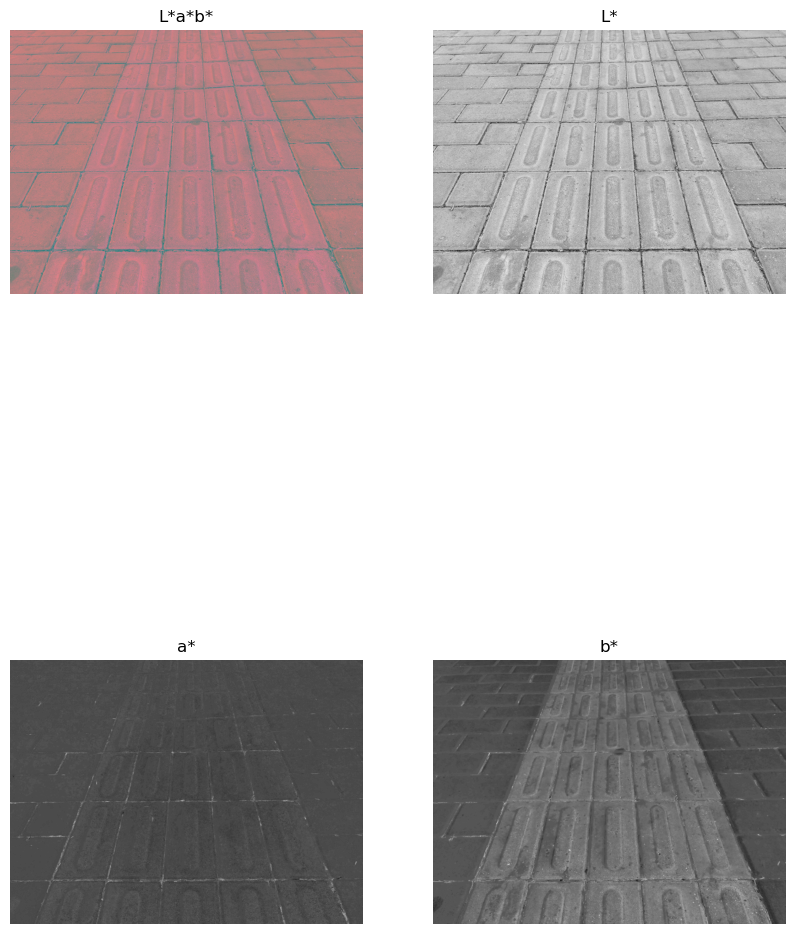

In [4]:
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
img_ls = img_lab[..., 0]
img_as = img_lab[..., 1]
img_bs = img_lab[..., 2] 

# 分通道显示图片
fig = plt.gcf()
fig.set_size_inches(10, 15)

plt.subplot(221)
plt.imshow(img_lab)
plt.axis('off')
plt.title('L*a*b*')

plt.subplot(222)
plt.imshow(img_ls, cmap='gray')
plt.axis('off')
plt.title('L*')

plt.subplot(223)
plt.imshow(img_as, cmap='gray')
plt.axis('off')
plt.title('a*')

plt.subplot(224)
plt.imshow(img_bs, cmap='gray')
plt.axis('off')
plt.title('b*')

plt.show()  


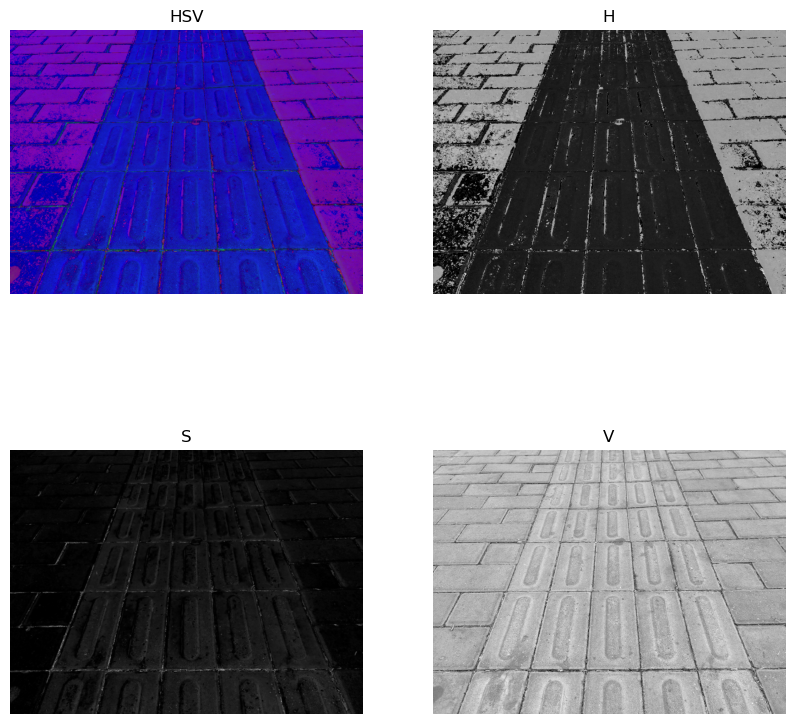

In [5]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_h = img_hsv[..., 0]
img_s = img_hsv[..., 1]
img_v = img_hsv[..., 2]

fig = plt.gcf()                      # 分通道显示图片
fig.set_size_inches(10, 10)

plt.subplot(221)
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV')

plt.subplot(222)
plt.imshow(img_h, cmap='gray')
plt.axis('off')
plt.title('H')

plt.subplot(223)
plt.imshow(img_s, cmap='gray')
plt.axis('off')
plt.title('S')

plt.subplot(224)
plt.imshow(img_v, cmap='gray')
plt.axis('off')
plt.title('V')

plt.show()


In [6]:
class Detection():
    def __init__(self, path:str) -> None:
        self.image = cv2.imread(rf"{path}")
        self.height = self.image.shape[0]
        self.width = self.image.shape[1]
        ...
    
    def img_resize(self, shape:tuple[int]=(640, 480)):
        self.image = cv2.resize(self.image, shape)
        self.height = self.image.shape[0]
        self.width = self.image.shape[1]
        ...
    
    def rgb2hsv(self, if_resize:bool=True, shape:tuple[int]=(640, 480)):
        if if_resize:
            self.img_resize(shape)
        else:
            pass
        self.hsv_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        return self.hsv_image

In [7]:
detection = Detection(pic_file)
# imshow(detection.rgb2hsv())
# detection.rgb2hsv()[1500:1550, 2000:2050,:]
# detection.img_resize((640, 480))

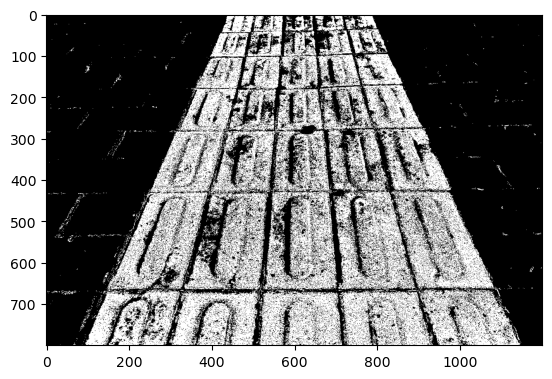

In [8]:
hsv = detection.rgb2hsv(shape=(1200, 800))
for i in range(detection.height):
    for j in range(detection.width):
        if (hsv[i, j, 0] > 10) & (hsv[i, j, 0] < 40) & (hsv[i, j, 1] > 5) & (hsv[i, j, 0] < 25) & (hsv[i, j, 2] > 140) & (hsv[i, j, 2] < 210):
            hsv[i, j, :] = [255, 255, 255]
        else:
            hsv[i, j, :] = [0, 0, 0]

plt.imshow(hsv)

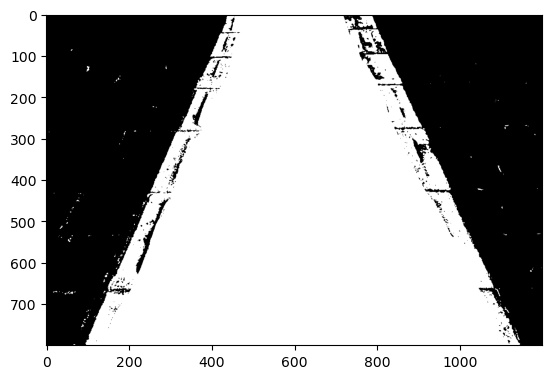

In [9]:
new = cv2.bitwise_or(cv2.medianBlur(hsv, 3), cv2.medianBlur(hsv, 221))
plt.imshow(new)

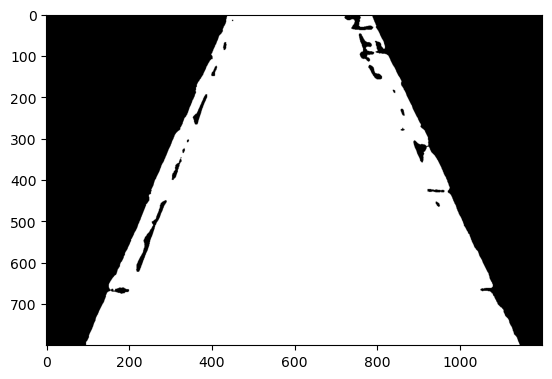

In [10]:
plt.imshow(new)
plt.imshow(cv2.medianBlur(new, 11))

In [12]:
imshow(cv2.bitwise_and(detection.image, cv2.medianBlur(new, 11)))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)